<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Skewness =  0.4785234382949897


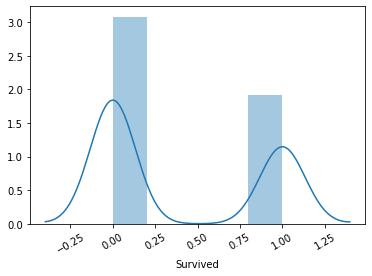

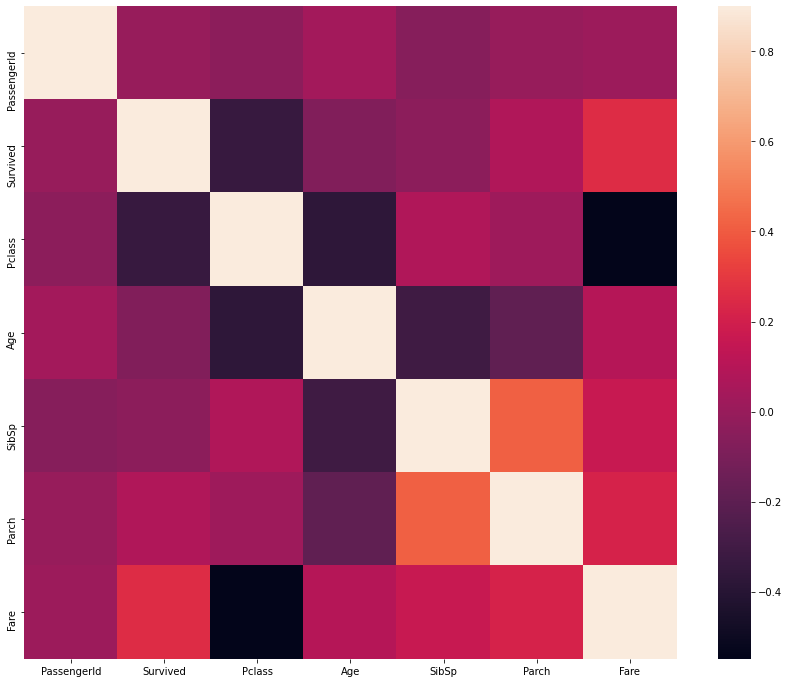

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fare         891 non-null    float64
 1   Parch        891 non-null    int64  
 2   PassengerId  891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Age          714 non-null    float64
 5   Pclass       891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [2]:
#Using general my data prep steps before building Decision Trees
#Importing the datasets
import pandas as pd
import numpy as np


train=pd.read_csv("train_titanic.csv", encoding="Latin-1")
test=pd.read_csv("test_titanic.csv", encoding="Latin-1")
submission=pd.read_csv("gender_submission.csv", encoding="Latin-1")

print(train.info())
print(test.info())

print(train.shape)
print(test.shape)


train['Survived'].value_counts()

#Let's visualize the distribution of Survived here
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['Survived'])
plt.xticks(rotation=30);


#Skewness is resonable and is close to 0. Hence, no transformation is needed
#even when skweness is not close to 0, we shouldn't go for transforming binary target
#Instead, if we have unequal distributions to large percentage, then we need to use SMOTE techniques

print('Skewness = ',train['Survived'].skew())


#Analzying more about correlated features
#In the basic steps, we are just analyzing/exploring the relationship between highly correlated variables
#Removing them will be handled later
corr = train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr,vmax=0.9,square=True)
plt.show();

#Diagonal columns need not be worried as the same variable is plotted against x-axis and y-axis
#And no lite color anywhere which suggests that there are no two variables with very high correlation



#Analyzing the top features that has close relationship/strong correlation with target
#We identify the top features and check for outliers in the data for these top features
#If outliers exist for these top features, then we remove those rows/observations
#Note: The top features identified below should not contain any NULL values
#In case of null values- we can either check for null values for the top features and remove the features with null values
# (OR) Completely skip this Technique 0.6 step and filter the outliers at the end before you build the model


#For now, let’s see how the features correlate with our target feature – SalePrice:
# correlation
corr = train.corr()
# sort in descending order
corr_top = corr['Survived'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]

corr_top

#I will save all of them(below) in my “top_features” list for reference later on.
#Below are the top features that are highly correlated with target


#Checking for null values among the top features listed below.
#This step will tell you whether you need to skip this procedure of removing outliers
#As all the columns are 0, we have no missing values in top features

train[top_features].isna().sum()

#If you see below,there are around 100 missing values in the top features. Hence, its better not to remove them now
#You can use this removal of outliers technique as last step of data prep after you split train vs test before model building

#This step will give you the data type for the top featues, but also non null values.
#You can also use this step to check null values as non null values are listed anyways

train[top_features].info()

In [3]:
# Ground work for making data ready for data preparation
#Now, all the data preparation steps except outlier removal should be applied on train and test data
#Because for example: if you create new features in train data and if they don't appear in test data, you will get error
#And the Technique 0.6 of filtering outliers should only be applied to train rows because we cannot filter test rows
#as we need to predict for every test row
#Hence, we are concatenating train and test after taking care of outliers
#if at all in case of null of values and if Technique 0.6 is skipped-then outliers should be removed at the end of
#data prep steps, after you separate train vs test again because test data will be concatenated with train here
#and if used without separation can cause some test rows also to get removed

#Before we start handling the missing values in the data, I am going to make a few tweaks to the train and test dataframes.

#I am going to concatenate the train and test dataframes into a single dataframe. 
#This will make it easier to manipulate their data. Along with that, I will make a few changes to each of them

#Store the number of rows in train dataframe to separate train and test dataframe later on
#Drop Id from train and test because it is not relevant for predicting sale prices
#Take the log transformation of target feature using np.log() to deal with the skewness in the data
#Drop the target feature as it is not present in test dataframe
#Concatenate train and test datasets


#train rows
ntrain = train.shape[0]

#save log transform of target feature
target = train['Survived']
#target = train['SalePrice']

#drop Id and SalePrice,Name and ticket as they are of no use from train dataframe
train.drop(['PassengerId','Survived','Name','Ticket','Cabin'],inplace=True,axis=1)

#store test Id
test_id = test['PassengerId']
#drop test Id
test.drop(['PassengerId','Name','Ticket','Cabin'],inplace=True,axis=1)

#concatenate train and test dataframes
train = pd.concat([train,test])


#Now train contains all rows of train+test

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


['Sex', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Sex         1309 non-null   object 
 2   Age         1046 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1308 non-null   float64
 6   Embarked    1307 non-null   object 
 7   Sex_female  1309 non-null   uint8  
 8   Sex_male    1309 non-null   uint8  
 9   Embarked_C  1309 non-null   uint8  
 10  Embarked_Q  1309 non-null   uint8  
 11  Embarked_S  1309 non-null   uint8  
dtypes: float64(2), int64(3), object(2), uint8(5)
memory usage: 88.2+ KB
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Index(['Age', 'Fare'], dtype='object')
Index(['Age', 'Fare'], dtype='object')
<class 'pandas.core.frame.DataFrame'>

Embarked_Q    2.786355
Parch         1.789762
SibSp         1.636821
Embarked_C    1.453566
Sex_female    0.602189
Fare_imp      0.546411
Age_imp       0.387899
Pclass       -0.598647
Embarked_S   -0.864756
dtype: float64

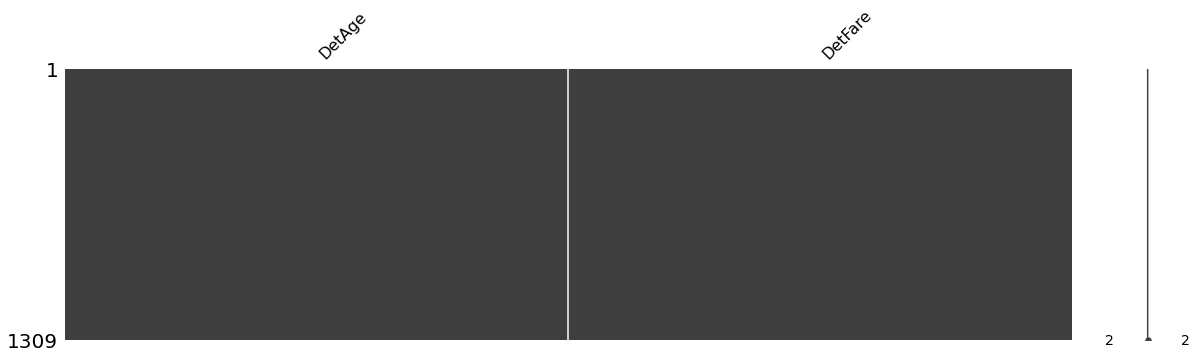

In [4]:
#Data Preparation Starts here

#Technique 1: One Hot Encoding

#Note: Label Encoding can be done only with Categorical data types if we require certain values like Small=1, M-2, Large-3
#Custom binary encoding can be done with categorical variables that has 2 values like 0 and 1
#For now, I have done One Hot Encoding for all categorical variables
#For other encoding, check codes from All_DataPrep_Steps Notebook

#One Hot Encoding should only be applied only to categorical variables

#In order to create these numerical features from categorical more accurately, we can analzye the cat columns more detailed
# and check if the cat columns do have 2 domain code values/ or if there is any order in categories like ordinal varaible

#1)In case of only 2 domain code values for cat variable- you can just use label encoding like 0/1 for same column
#instead of 2 columns which will be created via One Hot Encoding

#2) In case of cat variable- with more than 2 categories, we can also analyze if that variable is ordinal variable 
#rather than nominal. In case of ordinal, there will be some natural order. Hence, you can use 1-Small, 2-Medium,3-Large
# for the same variable instead of creating 3 variables with OneHot Encoding

#However, I haven't followed 1) and 2) listed above and directly used OneHot Encoding, but you can use it to get more
#accurate columns

#Categorical prints the entire dataset
categorical = train.select_dtypes(include='object')
#Categorical_cols gives you the columns
categorical_cols=categorical.columns
#Categorical_cols_list will give you the columns in the form of list
categorical_cols_list=list(categorical_cols)

print(categorical_cols_list)


#1.1 (contd) Creating categorical encoded variabels and adding them to the dataset

train_new=train #Here you are copying the train dataset into train_new

#You need to make sure to use prefix and prefix sep and column in order to get meaningful column names
# that has ColumnName_DomainCode value for that column

for column in categorical_cols_list:
    train_new= pd.concat([train_new,pd.get_dummies(train_new[column], prefix=column,prefix_sep='_', columns=categorical_cols_list)],axis=1)
    train_new=train_new
    
train_new.head()

#Checking whether the domain code values of that column matches with the created column names using value_counts for 2 var.

#When you see the train_new dataset at the end, you noticed that the original categorical variables also appeared 
#It's time to remove them so that subsequent dataset contains only numeric features

train_new.info()


#1.2 Removing all the categorical columns, there by preserving only numeric features
#Make sure the data types you are entering below covers all the data types of the features using above info()

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']
#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)

train_new=train_new[numeric_cols_list]

train_new.head()

#Now, you could see only numeric features in train_new dataset
train_new.shape


#Technique 2: Handling Missing data

#Null values
train_new.isna().sum().sort_values(ascending=False).head(20)

#You can see the list of missing values for each column sorted in descending order


train_new.head()

#2.1 Finding out missing values in the form of List so that you can copy in the later part of code to drop them
#after you perform the imputation

train_new.columns[train_new.isnull().any()]

missing_columns=train_new.columns[train_new.isnull().any()]

print(missing_columns)

#2.2 Simple Random Imputation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model


def random_imputation(train_new, feature):

    number_missing = train_new[feature].isnull().sum()
    observed_values = train_new.loc[train_new[feature].notnull(), feature]
    train_new.loc[train_new[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return train_new


for feature in missing_columns:
    train_new[feature + '_imp'] = train_new[feature]
    train_new = random_imputation(train_new, feature)
    

train_new.head()
#This method produces original column as well as imputed columns. In order to remove originla column you can use below
#However, this part is commented because Regression imputation (next technique) will automatically removed imputed
#values created here and create one ones and also will drop the original columns


#2.3 Deterministic Imputation
#This imputation takes care of imputed variables created using above technique 4.1
#If the imputed variable is not created, or if this is first form of imputation in code, make sure you remove 
#feature+_imp in the list of parameters otherwise you will get error

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = train_new[feature + "_imp"]
    parameters = list(set(train_new.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = train_new[parameters], y = train_new[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    #deter_data.loc[train_new[feature].isnull(), "Det" + feature] = model.predict(train_new[parameters])[train_new[feature].isnull()]
    
    
mno.matrix(deter_data, figsize = (20,5))

train_new.head()

#Now, you can see that for all missing columns in the data, there are imputed columns created at the end
#However, the original missing columns also do appear which we need to remove


#2.4 Now, we are dropping original missing columns
#Missing values entered in the drop statement below can be pulled from the output of 2.1 above

print(missing_columns)
train_new=train_new.drop(['Age','Fare'],axis=1) #Make sure you initialize to train_new. 
                                                                            #Otherwise, columns will not drop
train_new.head()


#Now, you can see that the original missing columns do not appear
#However, the imputed columns for every drop of original column appear at the end



#4. Removing correlated features

##In order to avoid overfitting, feature selection should only be applied to training data
#However,we did for both train and test here

#This applies to only numeric features, you will get error when we use categorical features
#Using this step before One Hot Encoding on training data, we will not have chance to remove constant columns of 
#categorical variables because now as all variables are converted from cat to int for which we can apply 
#removal of correlated features

#4.0.1 Prep steps for correlation
#For various Variance threshold, we need to make sure all the columns are converted into int 
#Although we know all are numerical features above this step, we are just using below step to make sure 
#that all are numerical features


train_new.info() #All columns are float64, int64 and uint8

numerics = ['int16','uint8','int32', 'int64', 'float16', 'float32', 'float64']

#Numeric prints the entire dataset
numeric = train_new.select_dtypes(include=numerics)
#Numeric_cols gives you the columns
numeric_cols=numeric.columns
#Numeric_cols_list will give you the columns in the form of list
numeric_cols_list=list(numeric_cols)

print(numeric_cols_list)


train_new_final=pd.DataFrame() #You can use this statement to generate empty dataframe

for column in numeric_cols_list:
    #train_new[column]=train_new[column].fillna(0)- no need as imputation was performed before correlation
    train_new[column]=train_new[column].astype(int)
    train_new_final[column]=train_new[column] #This will limit the train_new_final to contain only numeric features
    
train_new_final.head()


#4.1 Handling of constant columns with Variance Threshold
from sklearn.feature_selection import VarianceThreshold

train_features=train_new_final[numeric_cols_list]

print(train_features)

constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

#train_new_final originally contains 287 variables and after the filter of constant variance it contains 287 variables
len(train_features.columns[constant_filter.get_support()]) #This will give you number of non-contant columns

#No columns are constant columns


#Printing contant columns

constant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[constant_filter.get_support()]]

print(constant_columns) #No constant columns
print(len(constant_columns)) #0 constant columns

#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=constant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)
train_new_final.shape


#4.2 Removing Quasi Constant features
#Quasi constant features are the features that has same value for most observations of the variable
# The percentage of data points that has similar value for most observations is decided by threshold value
#For example, to find variables with 99% same value for data points, we need to use threshold value of 0.02

train_features=train_new_final[numeric_cols_list]

print(train_features)


qconstant_filter=VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_features)


#all variables are selected except one. That one is the target variable of SalePrice which is already dropped.

len(train_features.columns[qconstant_filter.get_support()]) #This will give you number of quasi non-contant columns


#Printing quasi contant columns

qconstant_columns=[column for column in train_features.columns
                 if column not in train_features.columns[qconstant_filter.get_support()]]

print(qconstant_columns) # quasi constant column names
print(len(qconstant_columns)) 


for column in qconstant_columns:
    print(column)
    
    
#To remove constant features from training and test sets, we can use transform
#However, in all Kaggle competitions, we neeed to use train and divide that train into train and test

train_features=qconstant_filter.transform(train_features)
#test_features=constant_filter.transform(test_features)


train_features.shape 


#4.3 Removing duplicate features 
#Features that has same values for every row, but under two variable names
#This will give you number of duplicate rows



train_features=train_new_final[numeric_cols_list]

print(train_features)


train_features_T=train_features.T
train_features_T.shape

print(train_features_T.duplicated().sum())# There is one duplication

unique_features=train_features_T.drop_duplicates(keep='first').T
unique_features.shape
#One column which has duplication for all rows is removed. Hence, 289 is reduced to 288 variables as seen below

#To find out what was that variable which got deleted due to duplication is below

duplicated_features=[dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features


#4.4 Removing correlated features using corr


train_features=train_new_final[numeric_cols_list]

print(train_features)


correlated_features=set()
correlation_matrix=train_new_final.corr()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.8:
            colname=correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(len(correlated_features))
print(correlated_features)


print(constant_columns) #No constant columns
print(qconstant_columns) # quasi constant column names
print(duplicated_features) #Printing duplicate features
print(correlated_features) #Printing correlated features

#Now that we have all the features which needs removal, they are printed below which you can use in drop statement below
#You can see that 4 features are correlated features which needs to be removed
#Do you know why they became correlated features?
#If you observe, all the below variables like Gender, Married, Education, Self_Employed are 2 cat variables
#They have only 2 categories. If Gender_Male is 0, then obviously Gender_Female is 1 which means similar var/we don't need 2
#If we would have coded, them as Label Encoding instead of One Hot Encoding we would not have seen below 4 corr features


train_new_final.shape


#Dropping all contsant, quasi constant, duplicated and correlated features
train_new_final=train_new_final.drop(['Sex_male'], axis=1)

train_new_final.shape


#5. Transformations and Scaling
#Observing the skewness of the variables
#You can also plot the variables to check if the skewness is correct
train_new_final.skew().sort_values(ascending=False)

#ppp.head(70)

#print(ppp.index)

#print(pd.Series)

#5.1 Transformations
#get numeric features
numeric_features = [f for f in train_new_final.columns if train_new_final[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new_final[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new_final[skewed] = np.log1p(train_new_final[skewed])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new_final[numeric_features])
scaled = scaler.transform(train_new_final[numeric_features])

for i, col in enumerate(numeric_features):
       train_new_final[col] = scaled[:,i]


train_new_final.info() #All columns are float64, int64 and uint8

print(train_new_final.shape)
    
train_new_final.head()

#All the feature transformations applies to the original varibales and values are changed and hence no new ones are created


#Checking skewness after Transformation and Scaling to make verify whether skewness is improved
#You can notice that skewness is completed reduced for all varaibles when you compare skewness here and at the staring step

train_new_final.skew().sort_values(ascending=False)


In [5]:
#Model Building Step 1:Now we are dividing train vs test into separately because we combined them before
##data prep steps


# train dataset
train_model = train_new_final.iloc[:ntrain,:]

# test dataset
test = train_new_final.iloc[ntrain:,:]


#Printing the shape of both
#Although train can have reduced number of rows due to removing/filtering obs due to outliers, test should have exactly
#same number of rows which exist in original data

print(train_model.shape)
print(test.shape)

(891, 9)
(418, 9)


In [6]:
#Model Building Step 2: Splitting the train data only into train vs test
#This is because the test data given in competitions doesn't have target variable which we cannot compare model performance
#splitting our train into train vs test will give you data from splitted train into test to compare model performance

from sklearn.model_selection import train_test_split

X = train_model
y = target

# training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

#The split above happens with 4 datasets= X_train, X_test, y_train, y_test
#Below, we analyze the data that is contained in all 4 sets

In [8]:
#Model 1: Building Decision Tree with default criterion. Default criterion is Gini method
#Note: DecisionTreeRegressor should be used for continuous outcome to build regression decision trees

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


Depth of the Decision Tree : 14
Target on train data [0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 

[0.10269206 0.0334082  0.05026063 0.32684621 0.01445453 0.00403523
 0.01730884 0.27124591 0.1797484 ]


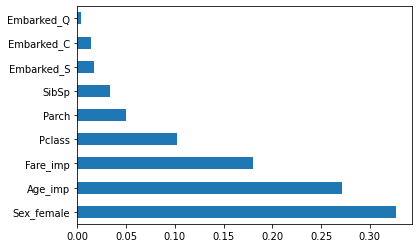

In [9]:
#Getting important features for the model built in Model 1

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

model =DecisionTreeClassifier()

model.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

feat_importances.nlargest(20).plot(kind='barh')

plt.show()

#As you can see that Sex, Age and Fare are the most significant variables in the dataset to predict the survival of the passenger

In [10]:
#Installing this package to get the visual decision tree
!pip install graphviz

In [11]:
#Installing this package to get the visual decision tree
!pip install pydotplus

In [12]:
#Installing this package to get the visual decision tree
!pip install pydot

In [13]:
#Setting up the feature_cols variable for plotting DT image below
feature_cols=list(X_train.columns)

print(feature_cols)

['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_imp', 'Fare_imp']


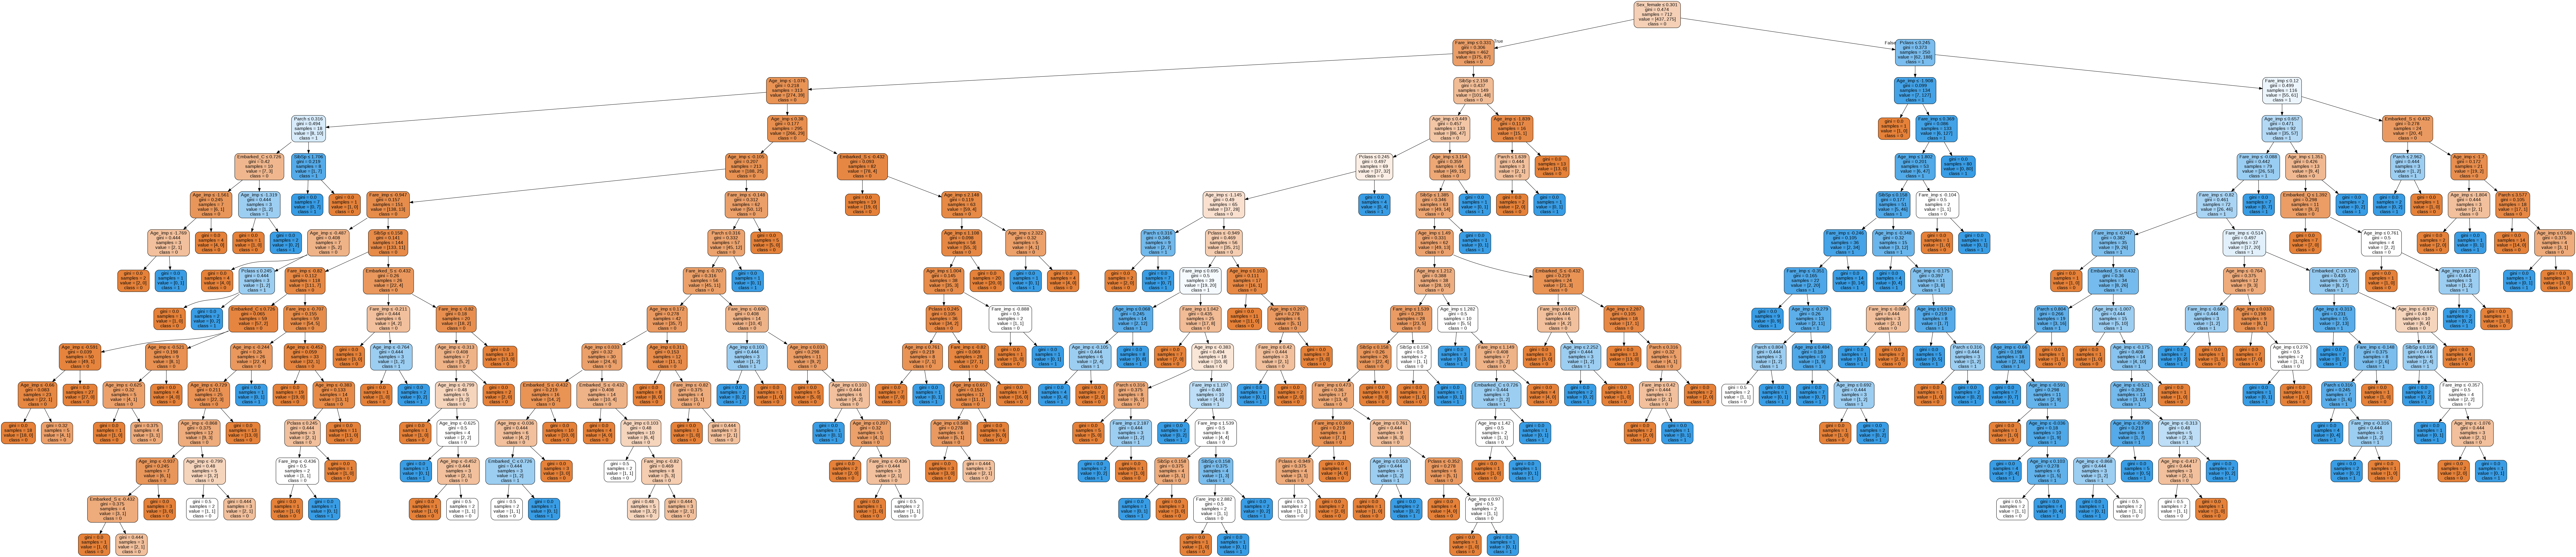

In [14]:
#Getting decision tree image (Code 1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
import pydot
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

#As you can see that Sex is the most important variable among all other variables as Sex variable formed as parent node in the DT below 


In [16]:
#Model 2: Model built with Entropy criterion
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

model = DecisionTreeClassifier(criterion='entropy')

# fit the model with the training data
model.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


Depth of the Decision Tree : 16
Target on train data [0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 

In [ ]:
#Model 1: Model built with no criterion used and not using any depth
accuracy_score on train dataset :  0.9719101123595506
accuracy_score on test dataset :  0.7821229050279329   
  

#Model 2: Model built with Entropy criterion
accuracy_score on train dataset :  0.9747191011235955
accuracy_score on test dataset :  0.7932960893854749
    

#You can see that Model 1 (Default criterion=Gini) and Model 2 (Entrophy citerion) models perfomed well during training and they did not do well on test data which is due to overfitting
#Models are considered overfit as they perform very well on Training data and they performed very poor on the test set

#Overfitting in decision tree is reduced via Pruning.
# Model 1 and Model 2 were built with Gini and Entrophy criterion without any restriction on depth of the tree
# Model 3 now is built with the depth of 3. Let's see if Pruning to less depth would reduce overfitting

Depth of the Decision Tree : 3
Target on train data [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1

[Text(167.4, 190.26, 'X[3] <= 0.301\ngini = 0.474\nsamples = 712\nvalue = [437, 275]'),
 Text(83.7, 135.9, 'X[8] <= 0.331\ngini = 0.306\nsamples = 462\nvalue = [375, 87]'),
 Text(41.85, 81.53999999999999, 'X[7] <= -1.076\ngini = 0.218\nsamples = 313\nvalue = [274, 39]'),
 Text(20.925, 27.180000000000007, 'gini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.177\nsamples = 295\nvalue = [266, 29]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 2.158\ngini = 0.437\nsamples = 149\nvalue = [101, 48]'),
 Text(104.625, 27.180000000000007, 'gini = 0.457\nsamples = 133\nvalue = [86, 47]'),
 Text(146.475, 27.180000000000007, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.245\ngini = 0.373\nsamples = 250\nvalue = [62, 188]'),
 Text(209.25, 81.53999999999999, 'X[7] <= -1.908\ngini = 0.099\nsamples = 134\nvalue = [7, 127]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\n

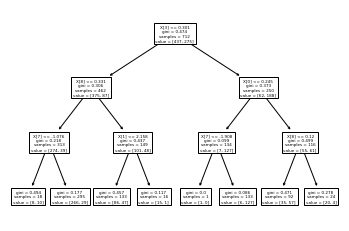

In [18]:
#Model 3: Same as decision tree described in Model 1, but it has maximum depth of 3 which includes layers in DT

#Building Decision Tree with default criterio. Default criterion Gini
#criterion{“gini”, “entropy”}, default=”gini”

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

model = DecisionTreeClassifier(max_depth=3)

# fit the model with the training data
model.fit(X_train,y_train)

# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = metrics.accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


#DT is printed in the form of text and also image. However, the image is unclear and its not good
from sklearn import tree

tree.plot_tree(model) 

#For the next two cells,there is code to get the clearer and color picture of Decision tree

In [ ]:
#Model 3 with reduced depth of 3 levels reduced the overfitting- As the training vs test data accuracy is very close

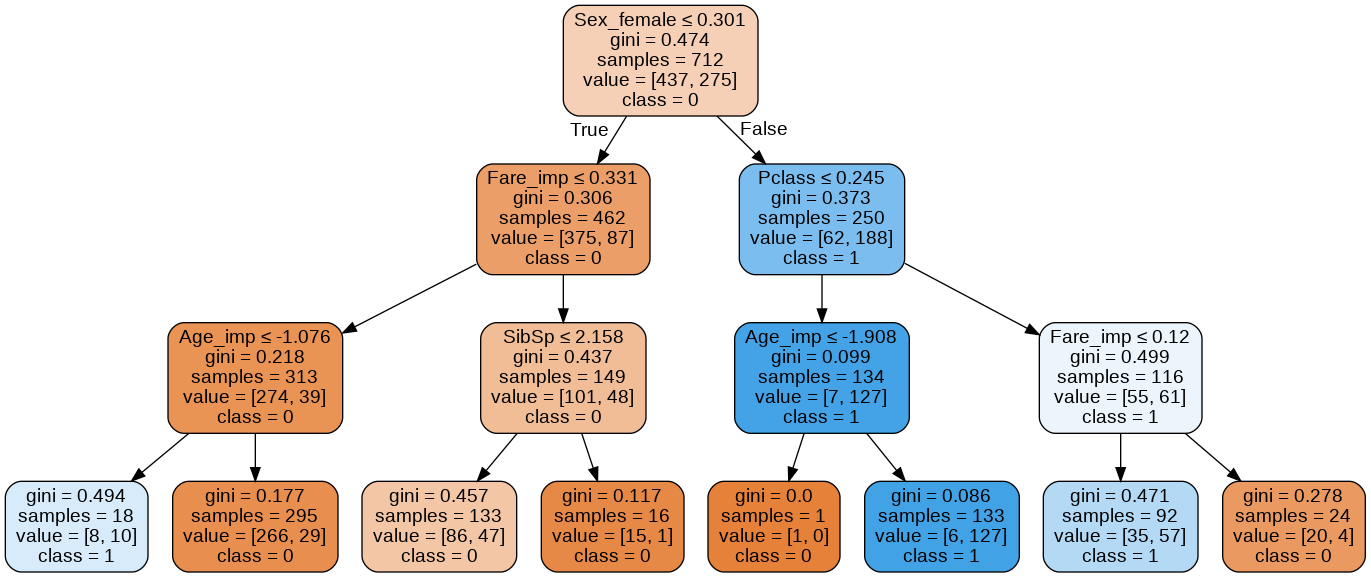

In [20]:
#Getting decision tree image with reduced depth (Pruning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
import pydot
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

#As you can see that Sex is the most important variable among all other variables as Sex variable formed as parent node in the DT below 

In [24]:
#Now, using the Pruned decision tree to predict observations with unseen data and to submit predictions to the competition


#Predicting the response for actual test data (unseen data) to submit it for the competition
pred=model.predict(test)


submission['PassengerId']=submission['PassengerId']
submission['Survived']=pred

submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#Writing the predicions to the Excel file for competition submission
submit.to_csv('decision_tree_submission.csv',index=False)
submit.head()
